In [1]:
ivar_fname = "/oak/stanford/orgs/kipac/users/delon/LensQuEst/act_dr5.01_s08s18_AA_f150_daynight_ivar.fits"

In [2]:
from pixell import enmap,utils
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
imap = enmap.read_map(ivar_fname)
#imap[0] should be for temperature

In [17]:
errmap = np.zeros_like(imap[0])
nonzero = np.where(imap[0] != 0)
errmap[nonzero] = 1/np.sqrt(imap[0][nonzero])

In [18]:
errmap_ratio = errmap / np.max(errmap)

In [29]:
from pixell import enplot
plots = enplot.plot(imap[0],range=.0064288,mask=0)

In [30]:
enplot.write("figures/ivar_plot",plots)


In [81]:
# plt.show()
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True

plt.rcParams['font.size'] = 13

(2400, 2400)


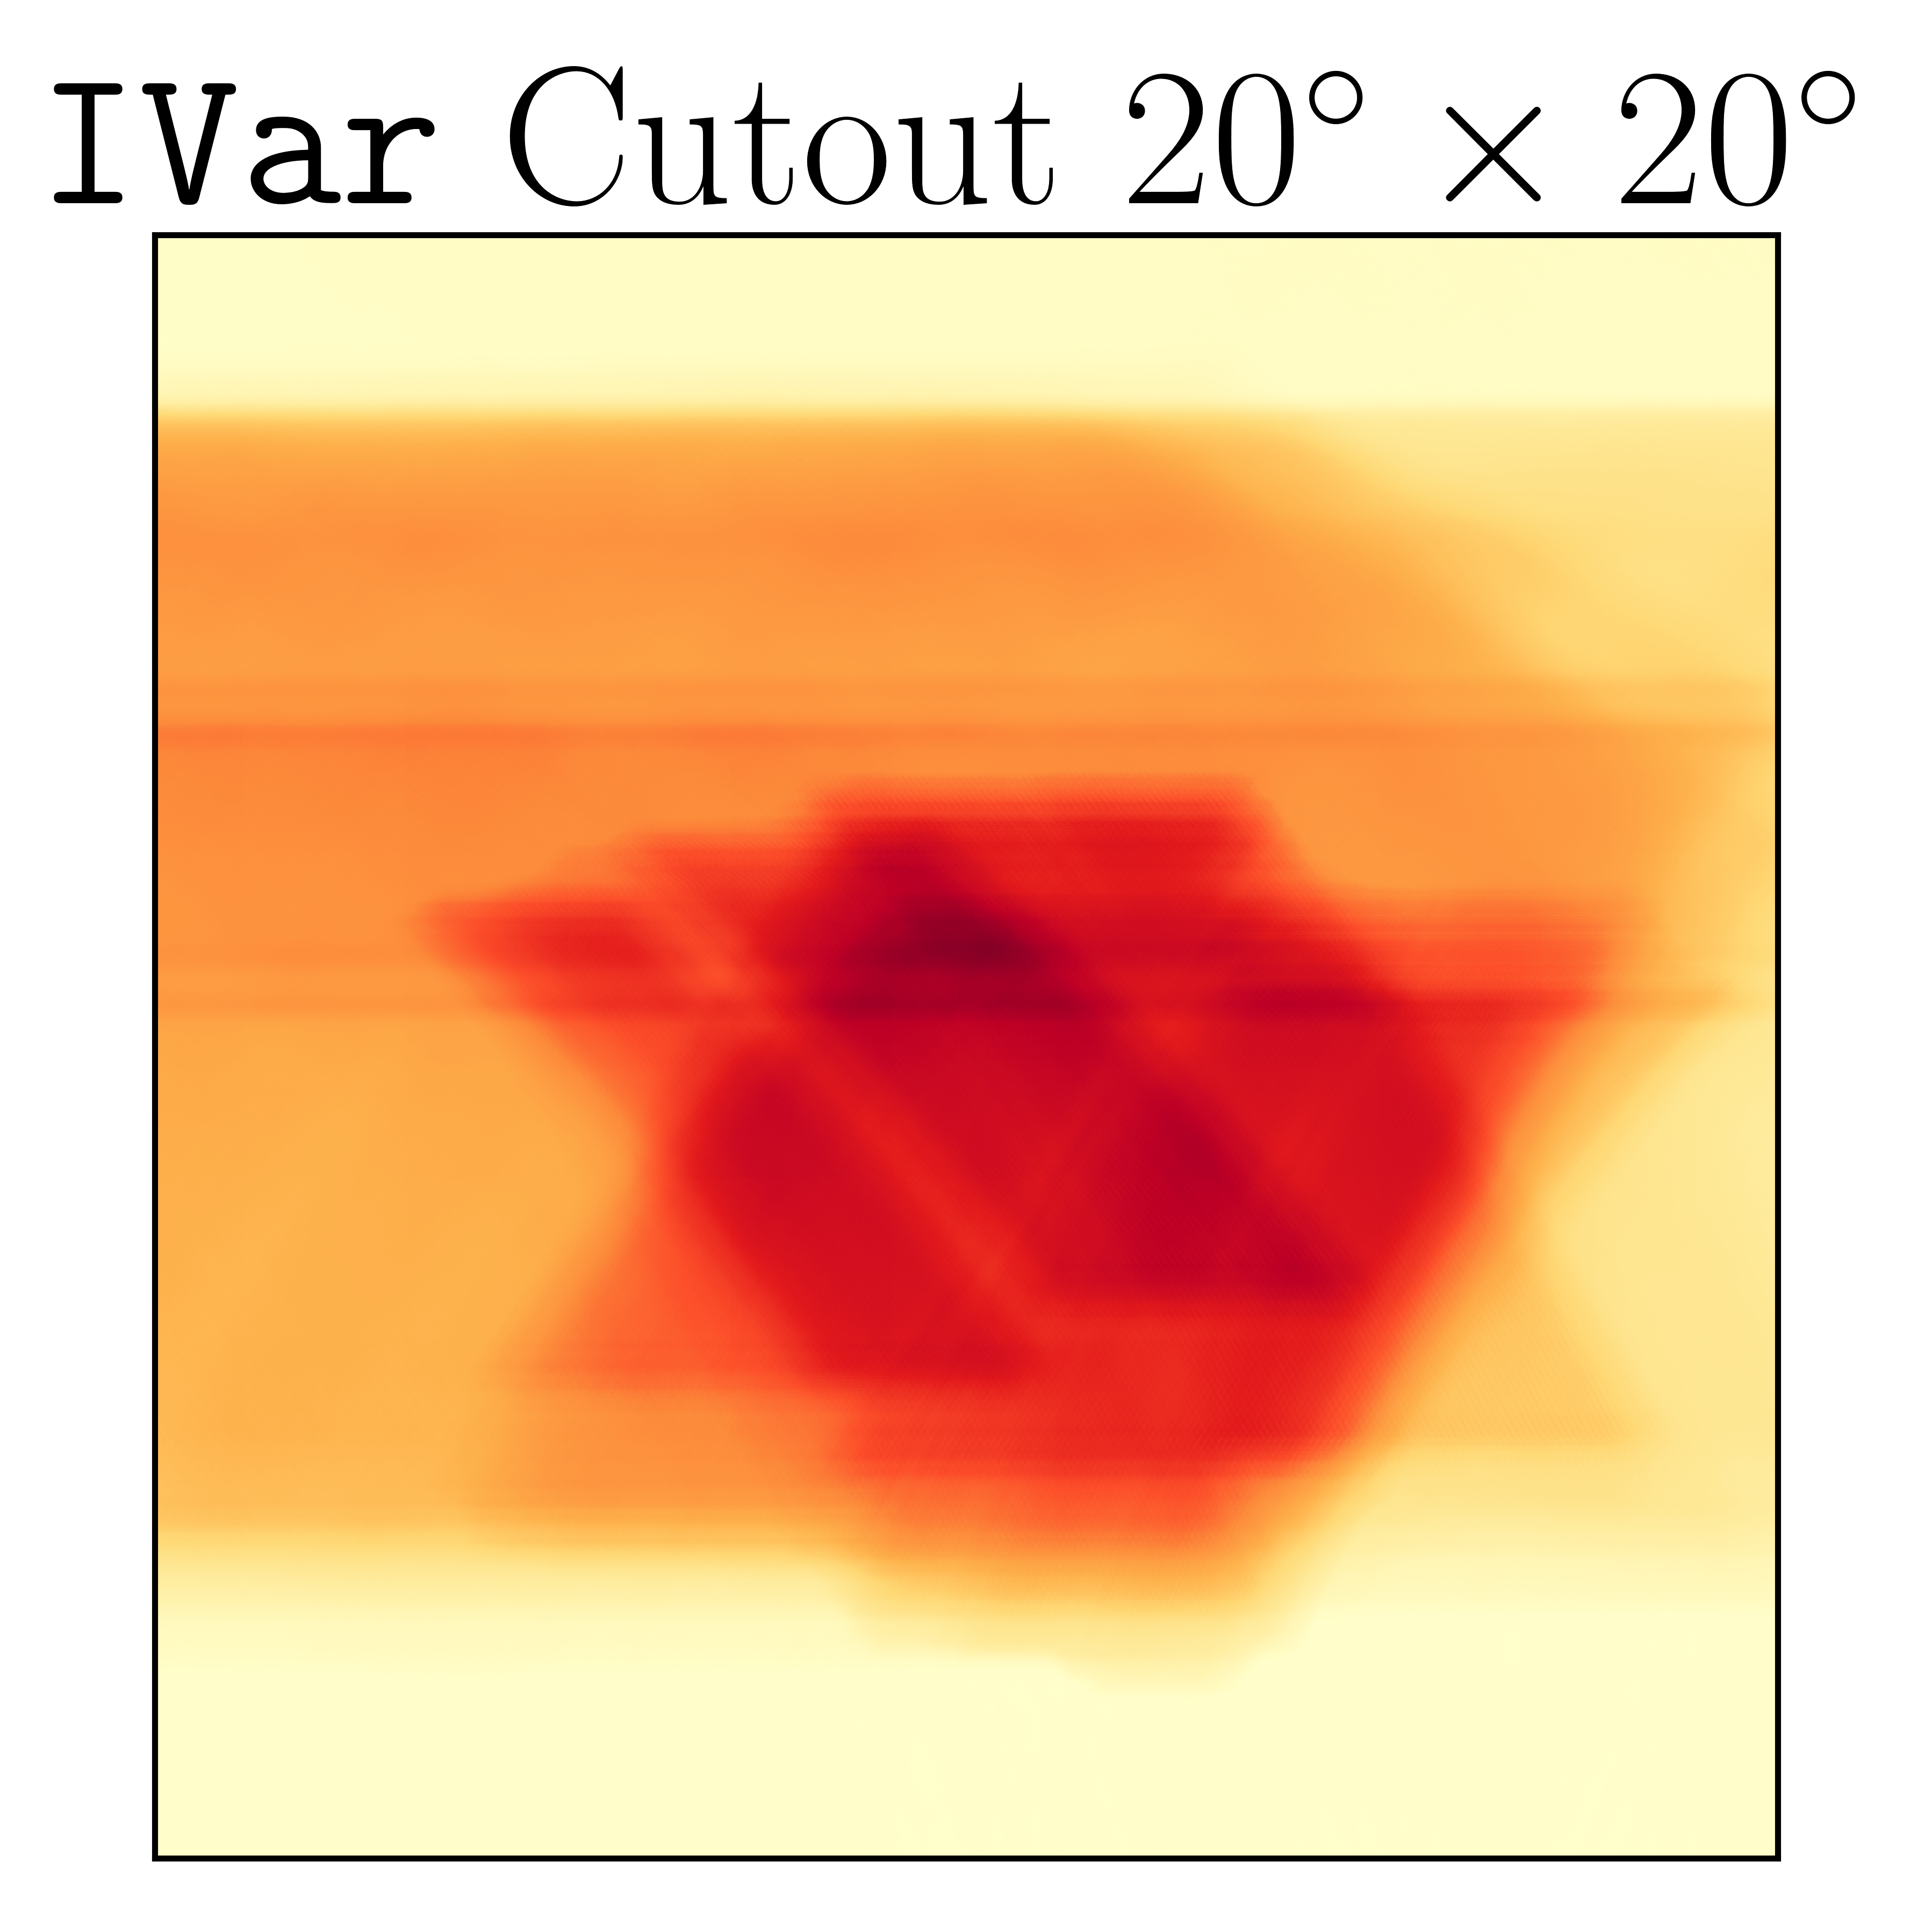

In [118]:
plt.figure(dpi=1000)

dec,ra = np.deg2rad([-2.38,33.92])
width = np.deg2rad(20.) # 20 deg x 20 deg box

box = np.array([[dec-width/2.,ra-width/2.],[dec+width/2.,ra+width/2.]])
stamp = imap[0].submap(box)
plt.title(r'\texttt{IVar} Cutout $20^{\circ}\times 20 ^{\circ}$')
plt.imshow(np.ma.masked_where(stamp == 0, stamp), cmap='YlOrRd')

plt.xticks([])
plt.yticks([])
plt.gca().set_ylim(plt.gca().get_ylim()[::-1])
# plt.gca().set_axis_off()

print(stamp.shape)
plt.savefig('figures/ivar_map_cutout.pdf', bbox_inches='tight')

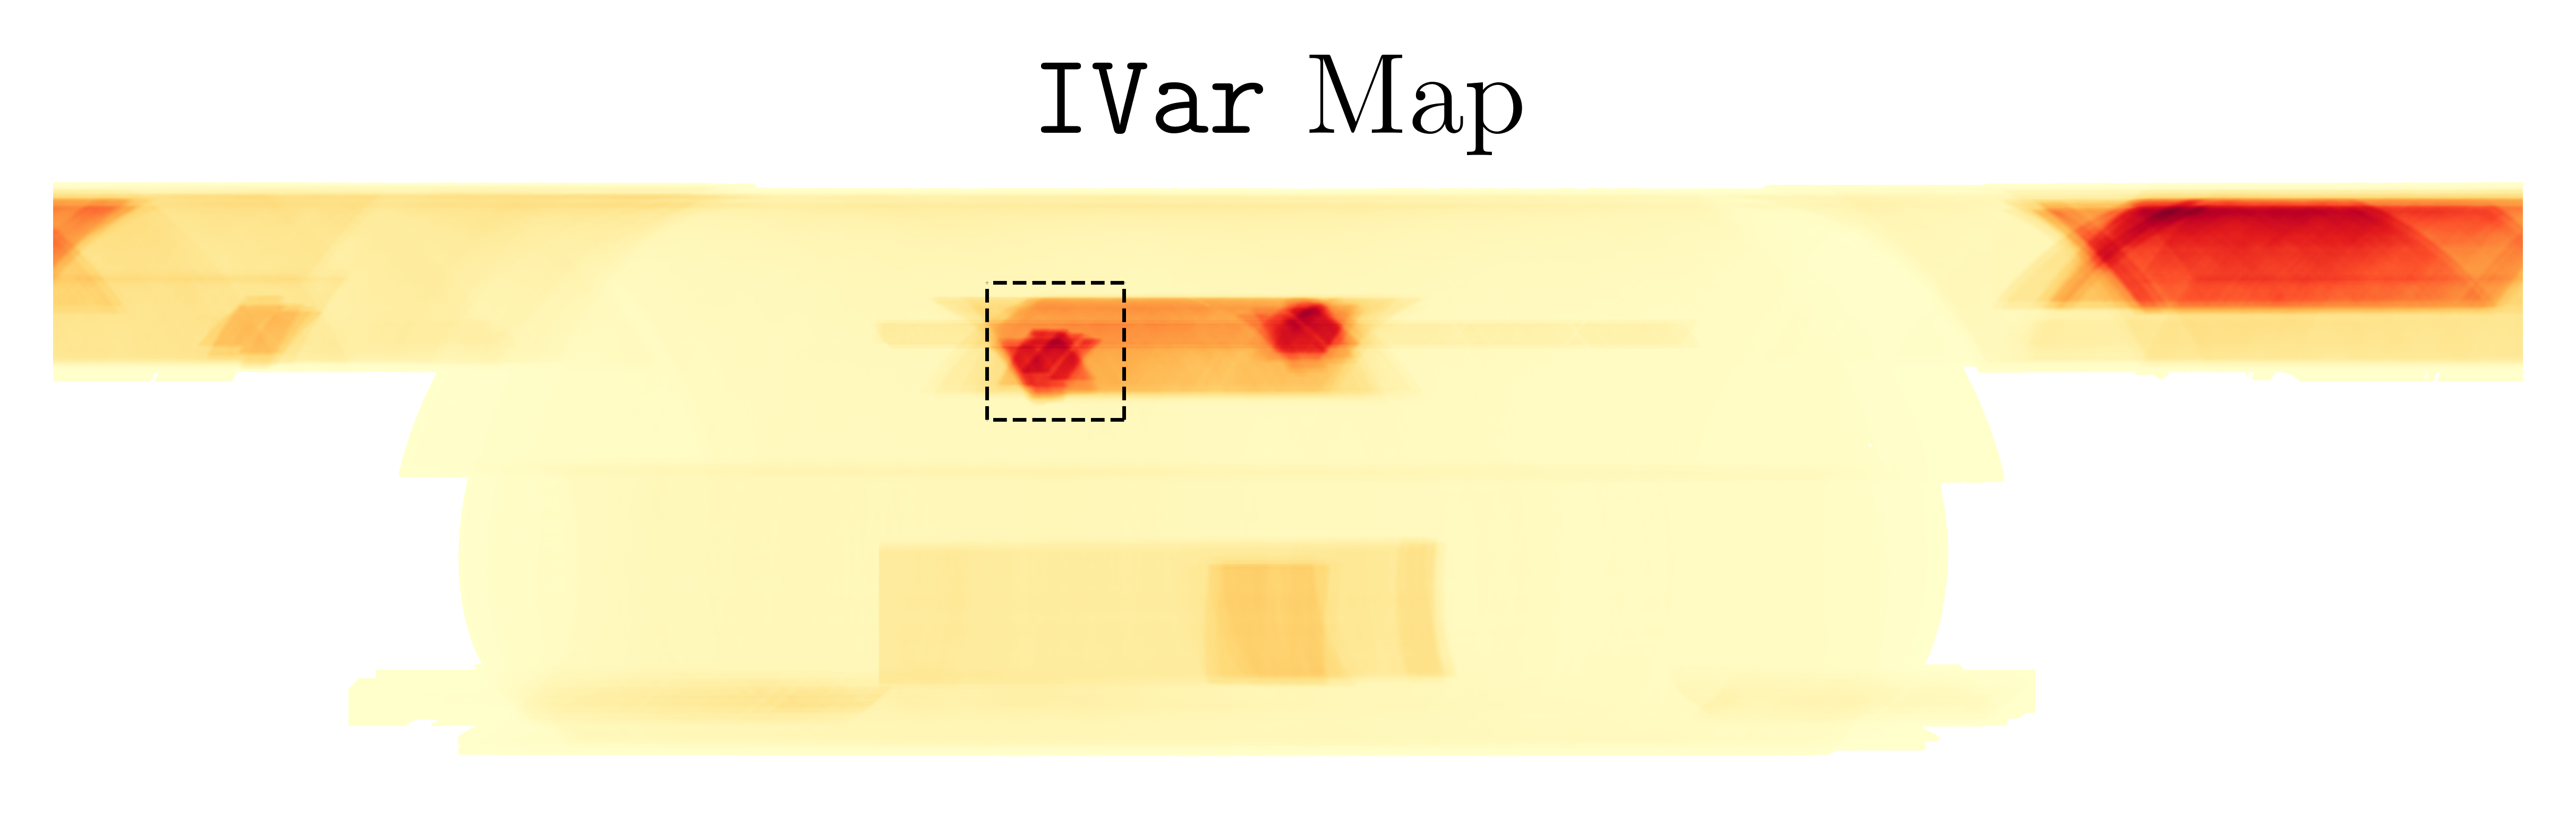

In [94]:
plt.figure(dpi=1000)





plt.imshow(np.ma.masked_where(imap[0] == 0, imap[0]), cmap='YlOrRd')


dec_range = [box[0,0], box[1,0]]
ra_range = [box[0,1], box[1,1]]
y, x = imap[0].sky2pix([dec_range, ra_range])
plt.plot([x[0], x[0]], [y[0], y[1]], 'k--', linewidth=0.5)
plt.plot([x[1], x[1]], [y[0], y[1]], 'k--', linewidth=0.5)
plt.plot([x[0], x[1]], [y[0], y[0]], 'k--', linewidth=0.5)
plt.plot([x[0], x[1]], [y[1], y[1]], 'k--', linewidth=0.5)

plt.xticks([])
plt.yticks([])
plt.gca().set_ylim(plt.gca().get_ylim()[::-1])
plt.gca().set_axis_off()

plt.title(r'\texttt{IVar} Map')
plt.savefig('figures/ivar_map.pdf', bbox_inches='tight')
plt.savefig('figures/ivar_map.png', bbox_inches='tight')

(1200, 1200)


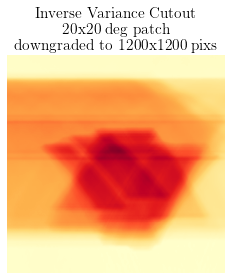

In [84]:
dec,ra = np.deg2rad([-2.38,33.92])
width = np.deg2rad(20.) # 20 deg x 20 deg box

box = np.array([[dec-width/2.,ra-width/2.],[dec+width/2.,ra+width/2.]])
stamp = imap[0].submap(box)
stamp = enmap.downgrade(stamp,2)

plt.title('Inverse Variance Cutout\n20x20 deg patch\ndowngraded to 1200x1200 pixs')
plt.imshow(np.ma.masked_where(stamp == 0, stamp), cmap='YlOrRd')

plt.xticks([])
plt.yticks([])
plt.gca().set_ylim(plt.gca().get_ylim()[::-1])
plt.gca().set_axis_off()
print(stamp.shape)

0.19724336 1.0
(1200, 1200)


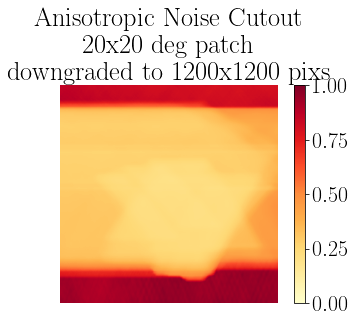

In [135]:
dec,ra = np.deg2rad([-2.38,33.92])
width = np.deg2rad(20.) # 20 deg x 20 deg box

box = np.array([[dec-width/2.,ra-width/2.],[dec+width/2.,ra+width/2.]])
stamp = imap[0].submap(box)
stamp = enmap.downgrade(stamp,2)
errmap = np.zeros_like(stamp)
errmap = 1/np.sqrt(stamp)
errmap = errmap / np.max(errmap)
errmap = np.array(errmap)
print(np.min(errmap), np.max(errmap))

plt.title('Anisotropic Noise Cutout\n20x20 deg patch\ndowngraded to 1200x1200 pixs')

plt.imshow(np.ma.masked_where(errmap == 0, errmap), cmap='YlOrRd', vmin=0, vmax=1)

plt.xticks([])
plt.yticks([])
plt.gca().set_ylim(plt.gca().get_ylim()[::-1])
plt.gca().set_axis_off()

plt.colorbar()
print(errmap.shape)

In [136]:
errmap

array([[0.94503987, 0.9453271 , 0.9443035 , ..., 0.95878726, 0.95221317,
        0.9625251 ],
       [0.94390804, 0.9418594 , 0.9345538 , ..., 0.9725007 , 0.95132   ,
        0.95404357],
       [0.9487302 , 0.94248503, 0.9356887 , ..., 0.959357  , 0.95318884,
        0.95863765],
       ...,
       [0.86886674, 0.873131  , 0.8668036 , ..., 0.7905182 , 0.7942976 ,
        0.79517585],
       [0.86938554, 0.86425847, 0.87578046, ..., 0.7954063 , 0.7971463 ,
        0.7899566 ],
       [0.8671727 , 0.86627   , 0.866327  , ..., 0.8053277 , 0.79668355,
        0.799886  ]], dtype=float32)

In [137]:
import pickle
with open('anisotropic_noise_map.pkl', 'wb') as f:
    pickle.dump(errmap, f)

In [138]:
#test applyying to noise mapa

In [139]:
#######
IN_DATA_FNAMES = ['/oak/stanford/orgs/kipac/users/delon/LensQuEst/map_sims_%d.pkl'%(i) for i in range(1,51)]


In [140]:
in_data = {}

fname = IN_DATA_FNAMES[0]
f = open(fname, 'rb') 
c_in_data = pickle.load(f) 
f.close()
for key in c_in_data:
    if(key not in in_data.keys()):
        in_data[key] = np.array(c_in_data[key])
    else:
        in_data[key] = np.vstack( (in_data[key],np.array(c_in_data[key])) )

for key in in_data:
    print(key, np.shape(in_data[key]))


cmb0F_1 (10, 1200, 601)
kCmbF_1 (10, 1200, 601)
lCmbF_1 (10, 1200, 601)
fgF_1 (10, 1200, 601)
noiseF_1 (10, 1200, 601)
totalF_1 (10, 1200, 601)
totalF_0 (10, 1200, 601)
totalF_randomized_0 (10, 1200, 601)


In [141]:
import os, sys
WORKING_DIR = os.path.dirname(os.path.abspath(''))
sys.path.insert(1, os.path.join(WORKING_DIR,'LensQuEst'))

from flat_map import *

# basic map object
baseMap = FlatMap(nX=1200, nY=1200, sizeX=20*np.pi/180., sizeY=20*np.pi/180.)


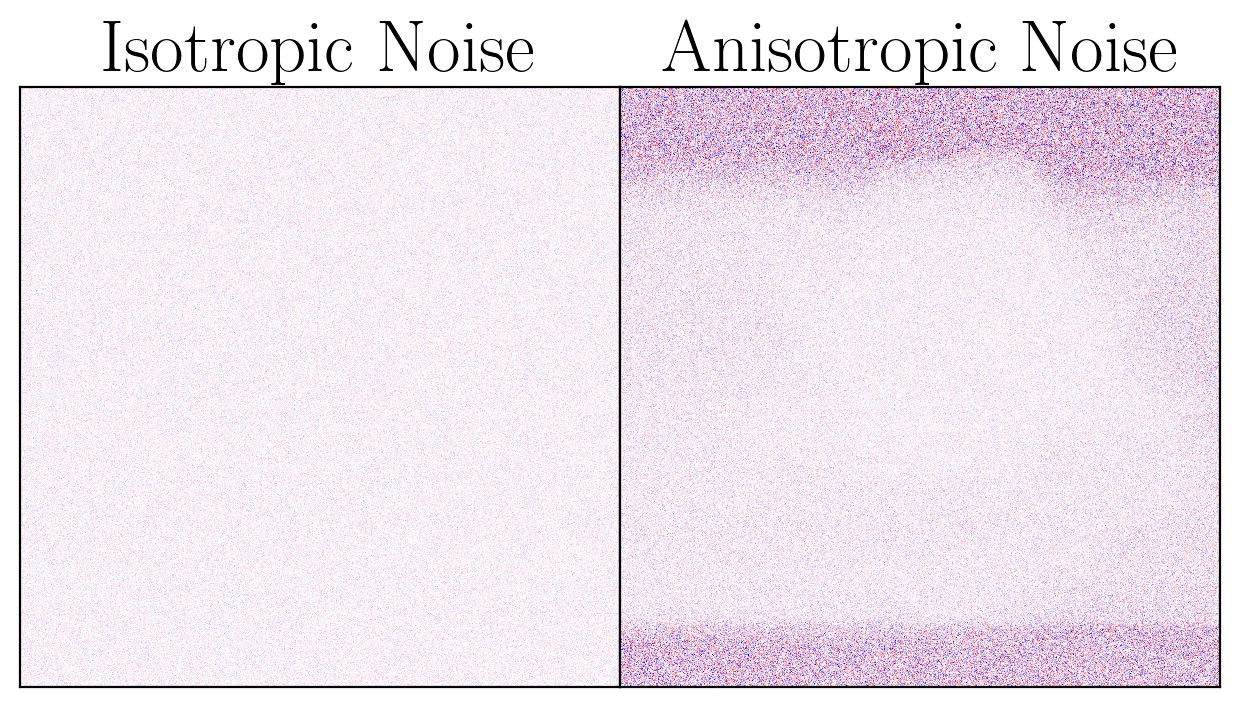

In [145]:

fig1 = plt.figure(dpi=200)

axs=[fig1.add_axes((0.0,0.2,.5,.8)), fig1.add_axes((0.5,0.2,.5,.8))]

axs[0].imshow(baseMap.inverseFourier(in_data['noiseF_1'][0]), vmin=-100, vmax=100, cmap='seismic')


#first we'll renormalize error map so that when we apply the error map, 
#at best, anisotropic_noise = isotropic noise
aniso_noise = baseMap.inverseFourier(in_data['noiseF_1'][0]) / np.min(errmap) 
aniso_noise = aniso_noise * errmap # apply errmap
axs[1].imshow(aniso_noise, vmin=-100, vmax=100, cmap='seismic')


axs[0].set_title('Isotropic Noise')
axs[1].set_title('Anisotropic Noise')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
plt.savefig('figures/anisotropic_noise_visual.pdf', bbox_inches='tight')

In [143]:
np.array(errmap)

array([[0.94503987, 0.9453271 , 0.9443035 , ..., 0.95878726, 0.95221317,
        0.9625251 ],
       [0.94390804, 0.9418594 , 0.9345538 , ..., 0.9725007 , 0.95132   ,
        0.95404357],
       [0.9487302 , 0.94248503, 0.9356887 , ..., 0.959357  , 0.95318884,
        0.95863765],
       ...,
       [0.86886674, 0.873131  , 0.8668036 , ..., 0.7905182 , 0.7942976 ,
        0.79517585],
       [0.86938554, 0.86425847, 0.87578046, ..., 0.7954063 , 0.7971463 ,
        0.7899566 ],
       [0.8671727 , 0.86627   , 0.866327  , ..., 0.8053277 , 0.79668355,
        0.799886  ]], dtype=float32)